In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

# Atividade 01 : Classificação por Limiar

1. Calcule as estatísticas descritivas de cada um dos atributos (características) agrupando por espécie;
2. Faça um histograma para cada atributo. Faça barras separadas para cada espécie de flor.
3. Com base nos passos 1 e 2, faça scatterplots com os pares de atributos que parecerem ser os mais
promissores para classificação das espécies.
4. A partir das observações que fizer nos passos 1–3, escolha o atributo que achar mais adequado para
separar as espécies.
5. Faça uma busca exaustiva procurando maximizar a acurácia no conjunto de treino.
6. Execute a busca exaustiva implementada no passo 5 com 20 particionamentos diferentes. Reporte os
resultados nos conjuntos de teste. Reporte a acurácia máxima e mínima. Calcule a acurácia média e o
desvio padrão. Use 80% dos dados para o conjunto de treino e 20% para o conjunto de teste.

# A base de dados

A base de dados que vamos usar está em ``iris_2class.csv``. Ela contempla características físicas de várias plantas de duas espécies diferentes : *versicolor* e *virginica*

In [2]:
df = pd.read_csv('iris_2class.csv')
df.columns=['sepal len', 'sepal wid', 'petal len',
       'petal wid', 'spec']
#Renomeando colunas
df

,sepal len,sepal wid,petal len,petal wid,spec
0,7.0,3.2,4.7,1.4,versicolor
1,6.4,3.2,4.5,1.5,versicolor
2,6.9,3.1,4.9,1.5,versicolor
3,5.5,2.3,4.0,1.3,versicolor
4,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,virginica
96,6.3,2.5,5.0,1.9,virginica
97,6.5,3.0,5.2,2.0,virginica
98,6.2,3.4,5.4,2.3,virginica


# Análise dos dados

Conhecer os dados é importante para projetar qualquer classificador. Esta análise serve para compreender a dificuldade do problema e possíveis métodos capazes de resolvê-lo.

Cada um dos elementos do conjunto de dados usado é caracterizado por quatro valores: altura e largura da sépala, altura e largura das pétalas


In [3]:
df.groupby('spec').describe().T

spec             versicolor  virginica
sepal len count   50.000000  50.000000
          mean     5.936000   6.588000
          std      0.516171   0.635880
          min      4.900000   4.900000
          25%      5.600000   6.225000
          50%      5.900000   6.500000
          75%      6.300000   6.900000
          max      7.000000   7.900000
sepal wid count   50.000000  50.000000
          mean     2.770000   2.974000
          std      0.313798   0.322497
          min      2.000000   2.200000
          25%      2.525000   2.800000
          50%      2.800000   3.000000
          75%      3.000000   3.175000
          max      3.400000   3.800000
petal len count   50.000000  50.000000
          mean     4.260000   5.552000
          std      0.469911   0.551895
          min      3.000000   4.500000
          25%      4.000000   5.100000
          50%      4.350000   5.550000
          75%      4.600000   5.875000
          max      5.100000   6.900000
petal wid count   50.000000  50.000000
          mean     1.326000   2.026000
          std      0.197753   0.274650
          min      1.000000   1.400000
          25%      1.200000   1.800000
          50%      1.300000   2.000000
          75%      1.500000   2.300000
          max      1.800000   2.500000

A partir das estatísticas calculadas para cada grupo, podemos verificar que a média da largura e altura da pétala tem uma diferença significativa. O comprimento da sépala é próximo entre as duas espécies e a largura mais ainda.

## Histograma

Vamos agora fazer um histograma das características de cada espécie para melhor visualizar os dados.

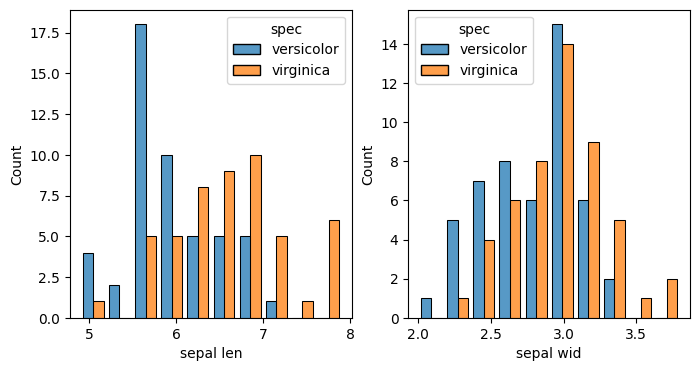

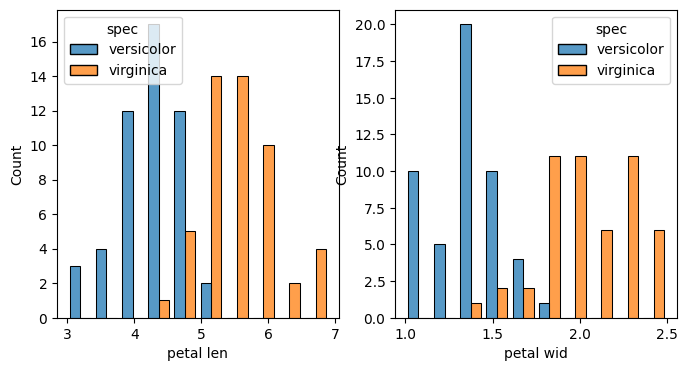

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
sns.histplot(data=df, bins=10, x='sepal len', hue='spec', multiple='dodge', shrink=0.8, ax=axes[0])
sns.histplot(data=df, bins=10, x='sepal wid', hue='spec', multiple='dodge', shrink=0.8,ax=axes[1])
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
sns.histplot(data=df, bins=10, x='petal len', hue='spec', multiple='dodge', shrink=0.8, ax=axes[0])
sns.histplot(data=df, bins=10, x='petal wid', hue='spec', multiple='dodge', shrink=0.8,ax=axes[1])
plt.show()

Percebemos pelo histograma que realmente as características relativas ao comprimento e largura das pétalas separam melhor as duas espécies.
Traçar um limiar em 5cm no comprimento das pétalas por exemplo, confundiria apenas 8 exemplos. Um total de 6 *virginica* seriam marcadas como *versicolor* e 2 *versicolor* seriam classificadas como *virginica*

## Scatterplot (gráfico de pontos)

Outra forma de visualizar os dados é usando o gráfico de pontos ( scatterplot ). Vamos construir os gráficos escolhendo algumas combinações de características que possam separar bem os dados

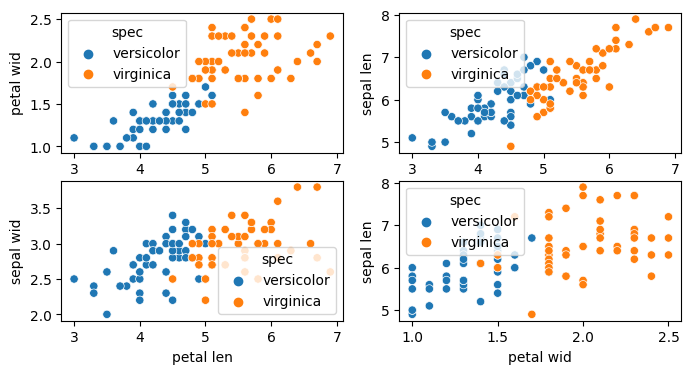

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,4))
#plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='petal len', y='petal wid', hue='spec', ax=axes[0][0])
sns.scatterplot(data=df, x='petal len', y='sepal len', hue='spec', ax=axes[0][1])
sns.scatterplot(data=df, x='petal len', y='sepal wid', hue='spec', ax=axes[1][0])
sns.scatterplot(data=df, x='petal wid', y='sepal len', hue='spec', ax=axes[1][1])
plt.show()

Conforme esperado, podemos ver que a característica de comprimento das pétalas separa melhor as duas espécies que queremos separar.Vamos tentar separar os conjuntos com a medida ``petal len=5``:

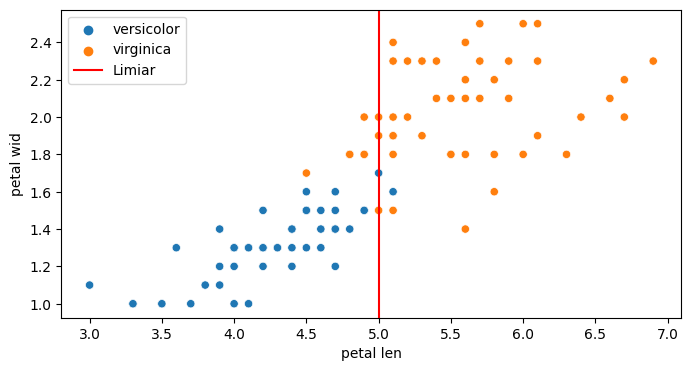

In [6]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='petal len', y='petal wid', hue='spec')
plt.axvline(5, color='red', label='Limiar')
plt.legend()
plt.show()

Podemos usar o limiar *5* no eixo do comprimento das pétalas para separar o espaço vetorial em duas regiões que separe as duas espécies

# Classificador

Escolhido um valor de limiar , podemos modelar uma função matemática
que fará a separação das classes.
Neste caso estamos usando apenas uma das características para classificar
## Exemplo de classificador por limiar

$$
f(\mathbf{x}) =
\begin{cases}
    Versicolor & \text{se } x[0] \leq 5 \\
    Virginica   & \text{se } x[0] \gt 5
\end{cases}
$$

In [7]:
def classificador_limiar(limiar, dados, rotulos=('versicolor', 'virginica')):
    resposta = []
    for idx, dado in dados.iterrows():
        if dado[0] <= limiar:
            resposta.append(rotulos[0])
        else:
            resposta.append(rotulos[1])
    return pd.DataFrame(resposta, columns=['spec'])

#A implementação a seguir é mais eficiente e tem o mesmo resultado
# def classificador_limiar(limiar, dados, rotulos=('versicolor', 'virginica')):
#     def f(dado):
#         return rotulos[0] if dado[0] <= limiar else rotulos[1]
#     resposta = dados.apply(f, axis=1)
#     return resposta



In [8]:
predicoes = classificador_limiar(5, df[['petal len', 'petal wid']])
for p in predicoes.values.flatten():
    print(p, end=", ")

versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, virginica, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, virginica, virginica, virginica, virginica, virginica, virginica, versicolor, virginica, virginica, virginica, virginica, virginica, virginica, versicolor, virginica, virginica, virginica, virginica, virginica, versicolor, virginica, versicolor, virginica, versicolor, virginica, virginica, versicolor, versicolor, virginica, virginica, virginica, virginica, virginica, virginica, virginica, virginica

# Verificando o desempenho do classificador

É necessário medir o desempenho do classificador desenvolvido para ter uma idéia de sua assertividade.

In [9]:
#imprimir os esportes da base de dados, juntamente com as predições
predicoes = classificador_limiar(5, df[['petal len', 'petal wid']])
for i in np.vstack([df['spec'].values, predicoes['spec'].values]).T:
    print(i)

['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'virginica']
['versicolor' 'versicolor']
['versicolor' 'versic

## Acurácia

Existem muitas medidas de desempenho de classificadores. Estas medidas são comumente conhecidas como métricas. Uma das métricas mais simples e intuitivas de classificação é chamada de **acurácia**. A acurácia é dada por:

$$
    \text{Acurácia} = \frac{\text{acertos}}{\text{total de instâncias}}
$$

Para contabilizar o número de acertos é necessário conhecer o gabarito (*ground-truth*) dos resultados. No caso da base de dados de jogadores de futebol e vôlei, o gabarito é o esporte que sabemos que determinada pessoa pratica. A seguir, temos uma função

In [10]:
def comparar_resultados(predicoes, gabarito, rotulo):
    predicoes = predicoes.values
    gabarito = gabarito.values
    acertos = 0
    erros = 0
    for i, gab in enumerate(gabarito):
        if gab == rotulo:
            if gab == predicoes[i]:
                acertos+=1
            else:
                erros+=1
    return acertos, erros

In [11]:
resultados_versicolor = comparar_resultados(predicoes['spec'], df['spec'], 'versicolor')
resultados_virginica = comparar_resultados(predicoes['spec'], df['spec'], 'virginica')

print("(Versicolor) Acertos e Erros:", resultados_versicolor)
print("(Virginica) Acertos e Erros:", resultados_virginica)

(Versicolor) Acertos e Erros: (49, 1)
(Virginica) Acertos e Erros: (41, 9)


Agora vamos calcular a acurácia do classificador para cada classe separadamente, e depois para o classificador de um modo geral.

In [12]:
def acuracia(acertos, total_instancias):
    return acertos / total_instancias

print("Acurácia (Versicolor): %.3f" % (acuracia(resultados_versicolor[0], resultados_versicolor[0] + resultados_versicolor[1]) ))
print("Acurácia (Virginica): %.3f" % (acuracia(resultados_virginica[0], resultados_virginica[0] + resultados_virginica[1]) ))
total_de_instancias = len(predicoes)
print("Acurácia (Total): %.3f" % (acuracia(resultados_versicolor[0] + resultados_virginica[0], total_de_instancias) ))

Acurácia (Versicolor): 0.980
Acurácia (Virginica): 0.820
Acurácia (Total): 0.900


In [13]:
# A biblioteca sklearn tem várias métricas implementadas que iremos estudar durante o curso.
from sklearn.metrics import accuracy_score
print("Acurácia (Total) %.3f" % (accuracy_score(df['spec'], predicoes['spec'])))

Acurácia (Total) 0.900


# Aprendizado do limiar por busca exaustiva

Até o momento, escolhemos os parâmetros manualmente, vamos agora fazer um algoritmo simples de aprendizado, que busca exaustivamente possíveis valores de limiar que otimizem a acurácia.

Uma ténica para fazer essa busca é dividir o espaço de procura em valores fixos e procurar entre eles. Para isso, vamos procurar os valores mínimo e máximo do atributo escolhido e dividir , para que o algoritmo percorra à passos iguais.

Melhor limiar: 4.847, Melhor Acurácia: 0.930


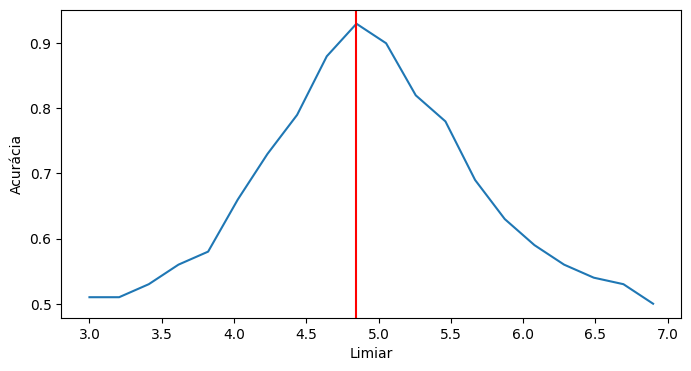

In [14]:
n_limiares = 20

maxval=max(df["petal len"])
minval=min(df["petal len"])
limiares = np.linspace(minval, maxval, n_limiares)

acuracias = []
melhor_limiar = limiares[0]
melhor_acuracia = 0

dados = df[['petal len', 'petal wid']]

for limiar in limiares:
    predicoes = classificador_limiar(limiar, dados)

    acuracia = accuracy_score(df['spec'], predicoes['spec'])
    acuracias.append(acuracia)

    if acuracia > melhor_acuracia:
        melhor_acuracia = acuracia
        melhor_limiar = limiar

print("Melhor limiar: %.3f, Melhor Acurácia: %.3f" % (melhor_limiar, melhor_acuracia))

fig, axes = plt.subplots(figsize=(8,4))
axes.plot(limiares, acuracias)
axes.axvline(melhor_limiar, color='red')
axes.set_xlabel('Limiar')
axes.set_ylabel('Acurácia')
plt.show()

A busca exaustiva encontrou um bom resultado, porém para a maioria dos problemas do mundo real, não há somente um atributo a ser avaliado o que torna essa estratégia inviável, pois classificar várias vezes em um espaço de busca grande é computacionalmente custoso.

# Generalização

Até o momento, avaliamos a acurácia do classificador com os mesmos exemplos apresentados na fase de treinamento. Isso é um erro grave pois não leva em conta a **generalização**, que é a habilidade de acertar a classificação de casos que não foram explicitamente mostrados, em outras palavras é o aprendizado em si.

Portante, precisamos dividir nossa base de dados em :
* Exemplos que serão apresentados ao classificador, para que escolha os melhores parâmetros e chegue a uma função de decisão ( no nosso caso, um limiar )
* Instâncias que serão utilizadas para testar a generalização do modelo

In [15]:
#A função train_test_split faz ao particionamento (split) da base de dados nos conjuntos de treino e teste

train_percent=0.2 # 20% teste 80% treino

x_treino, x_teste, y_treino, y_teste = train_test_split(df[['petal len', 'petal wid']], df['spec'],
                                                        test_size=train_percent, stratify=df['spec'].tolist(),
                                                        shuffle=True, random_state=10)

O parametro ``test_size`` indica a fração dos dados da base de dados que serão colocados no conjunto de teste. Seu complemento (``1-test_size``) indica a fração dos dados que serão colocados no conjunto de treino.

O parâmetro ``stratify`` indica os rótulos que são usados para separar os conjuntos de treino e teste de forma estratificada. Isto garante que a proporção dos dados por classe é mantida a mais próxima possível em relação a base de dados original.

Um outro parâmetro importante é o ``random_state``, que é usado como semente do gerador de números aleatórios . Se o número for mantido é garantido que o particionamento será igual, assim podemos reproduzir os testes mais facilmente.

Note que apresentar diferentes conjuntos de dados ao classificador resultará numa escolha diferente de parâmetros, assim seu desempenho também será diferente.

Vamos agora gerar diferentes conjuntos de treino e teste e verificar o desempenho de cada um

In [16]:
def classificador(limiar, dados,coluna, rotulos=('versicolor', 'virginica')):
    resposta = []
    for index,dado in dados.iterrows():
      #print(f"{dado[coluna]} : {limiar} {dado[coluna]>limiar}")
      if dado[coluna] <= limiar:
        resposta.append(rotulos[0])
      else:
        resposta.append(rotulos[1])
    return pd.DataFrame(resposta, columns=['spec'])

In [65]:
#Atualizando função de busca para realizar só em um conjunto que será passado ( treino )
def busca_exaustiva_limiar(n_limiares,x_treino,x_teste,y_treino,y_teste,coluna):
    resultados = []
    limiares = np.linspace(x_treino[coluna].min(),
                           x_treino[coluna].max(),
                           n_limiares)

    melhor_limiar = limiares[0]
    melhor_acuracia=-1

    for limiar in limiares:
        predicoes = classificador(limiar, x_teste,coluna,['versicolor','virginica'])
        acuracia = accuracy_score(y_teste, predicoes)
        print(f"Testando limiar: {limiar:.2f}, acc = {acuracia:.2f}")
        resultados.append((acuracia,limiar))

        #if acuracia > melhor_acuracia:
        #    melhor_acuracia = acuracia
        #    melhor_limiar = limiar


    #print(f"Melhor limiar : {melhor_limiar:.2f} , Melhor acurácia = {melhor_acuracia:.2f}")
    #return melhor_limiar, melhor_acuracia
    return resultados

n_particoes = 20
train_percent=0.2 # 20% teste 80% treino
resultados =[]
for i in range(n_particoes):
  print("-"*30)
  print("Resultados para o particionamento número: ",i)
  x_treino, x_teste, y_treino, y_teste = train_test_split(df[['petal len', 'petal wid']], df['spec'],
                                                        test_size=train_percent, stratify=df['spec'].tolist(),
                                                        shuffle=True)

  resultados.extend(busca_exaustiva_limiar(10,x_treino,x_teste,y_treino,y_teste,'petal len'))


------------------------------
Resultados para o particionamento número:  0
Testando limiar: 3.30, acc = 0.55
Testando limiar: 3.70, acc = 0.55
Testando limiar: 4.10, acc = 0.60
Testando limiar: 4.50, acc = 0.75
Testando limiar: 4.90, acc = 0.85
Testando limiar: 5.30, acc = 0.80
Testando limiar: 5.70, acc = 0.60
Testando limiar: 6.10, acc = 0.55
Testando limiar: 6.50, acc = 0.55
Testando limiar: 6.90, acc = 0.50
------------------------------
Resultados para o particionamento número:  1
Testando limiar: 3.00, acc = 0.50
Testando limiar: 3.41, acc = 0.55
Testando limiar: 3.82, acc = 0.55
Testando limiar: 4.23, acc = 0.75
Testando limiar: 4.64, acc = 0.95
Testando limiar: 5.06, acc = 1.00
Testando limiar: 5.47, acc = 0.90
Testando limiar: 5.88, acc = 0.75
Testando limiar: 6.29, acc = 0.60
Testando limiar: 6.70, acc = 0.55
------------------------------
Resultados para o particionamento número:  2
Testando limiar: 3.30, acc = 0.55
Testando limiar: 3.70, acc = 0.55
Testando limiar: 4.10, a

In [66]:
#Vamos analisar agora os resultados de cada particionamento:
melhor_limiar_geral = resultados[0][1]
melhor_acc_geral    = resultados[0][0]

pior_limiar_geral   = resultados[0][1]
pior_acc_geral      = resultados[0][0]

idx_melhor_acc      = 0
idx_pior_acc        = 0

for i in range ( len ( resultados )):
  l_atual   =resultados[i][1]
  acc_atual =resultados[i][0]
  if acc_atual > melhor_acc_geral:
    melhor_acc_geral= acc_atual
    melhor_limiar_geral=l_atual
    idx_melhor=i//20
  if acc_atual < pior_acc_geral:
    pior_acc_geral = acc_atual
    pior_limiar_geral = l_atual
    idx_pior_acc = i//20

print("- "*30)
print(f"Melhor acc geral :{melhor_acc_geral:.2f}, com limiar {melhor_limiar_geral:.2f} , na divisão {idx_melhor_acc}")
print(f"Pior acc geral :{pior_acc_geral:.2f}, com limiar {pior_limiar_geral:.2f} , na divisão {idx_pior_acc}")


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Melhor acc geral :1.00, com limiar 5.06 , na divisão 0
Pior acc geral :0.50, com limiar 6.90 , na divisão 0


In [67]:
#Exibindo a média e melhores resultados :
media_acuracias = sum( resultado[0] for resultado in resultados)/len(resultados)
desvio_padrao = np.std(np.array([resultado[0] for resultado in resultados]))

print(f"Acurácia média: {media_acuracias:.3f} , desvio padrão: {desvio_padrao:.3f} ")


Acurácia média: 0.652 , desvio padrão: 0.152 
